In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from pprint import pprint
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data set

### training data

In [71]:
tdS = pd.read_csv('./dataCSV/manSf_training.csv') #'training.csv'파일 불러오기 - ndvi 안한거
tdSG = pd.read_csv('./dataCSV/manSGf_training.csv')

In [72]:
tdS_7 = tdS.drop(tdS[tdS['family']==7].index)
tdSG_7 = tdSG.drop(tdSG[tdSG['family']==7].index)
tdS_7

,family,SBI,YVI,WBI,SIPI
0,2,0.298280,-0.016917,-0.013949,0.728839
1,2,0.317979,-0.018384,-0.019453,0.797843
2,4,0.302055,-0.017910,-0.007879,0.764795
3,2,0.304262,-0.014294,-0.015841,0.730870
4,2,0.271016,-0.009948,-0.022487,0.635918
...,...,...,...,...,...
1571,6,0.386990,-0.040443,-0.033954,0.819819
1572,6,0.403220,-0.037413,-0.027609,0.793904
1573,6,0.416955,-0.049195,-0.040042,0.860030
1574,6,0.404550,-0.040675,-0.038480,0.748603


In [73]:
tdSG

,family,SBI,YVI,WBI,SIPI,MEAN,VAR,HOMO,DISSI,ENTROPY
0,2,0.298280,-0.016917,-0.013949,0.728839,0.203750,63.033989,0.821769,0.6576,2.343803
1,2,0.317979,-0.018384,-0.019453,0.797843,0.242388,87.777626,0.833767,0.6600,2.201375
2,4,0.302055,-0.017910,-0.007879,0.764795,0.241850,65.340111,0.697489,0.7832,3.468864
3,2,0.304262,-0.014294,-0.015841,0.730870,0.257269,91.668144,0.726444,0.9676,3.056463
4,2,0.271016,-0.009948,-0.022487,0.635918,0.212612,64.191360,0.729394,0.9656,3.146740
...,...,...,...,...,...,...,...,...,...,...
1571,6,0.386990,-0.040443,-0.033954,0.819819,0.247169,66.108940,0.573028,1.2404,4.008459
1572,6,0.403220,-0.037413,-0.027609,0.793904,0.249956,68.771187,0.547515,1.3244,4.091058
1573,6,0.416955,-0.049195,-0.040042,0.860030,0.226025,60.233128,0.592855,1.2008,3.930270
1574,6,0.404550,-0.040675,-0.038480,0.748603,0.128031,26.144325,0.809760,0.5932,2.486631


## man_training split test (Create mantest) - extract same percent LC

In [74]:
lcS1 = tdS_7[ tdS_7['family'] == 1 ]
lcS2 = tdS_7[ tdS_7['family'] == 2 ]
lcS3 = tdS_7[ tdS_7['family'] == 3 ]
lcS4 = tdS_7[ tdS_7['family'] == 4 ]
lcS5 = tdS_7[ tdS_7['family'] == 5 ]
lcS6 = tdS_7[ tdS_7['family'] == 6 ]
# lcS7 = tdS_7[ tdS_7['family'] == 7 ]
lcS = [lcS1, lcS2, lcS3, lcS4, lcS5, lcS6]

In [75]:
lcSG1 = tdSG_7[ tdSG_7['family'] == 1 ]
lcSG2 = tdSG_7[ tdSG_7['family'] == 2 ]
lcSG3 = tdSG_7[ tdSG_7['family'] == 3 ]
lcSG4 = tdSG_7[ tdSG_7['family'] == 4 ]
lcSG5 = tdSG_7[ tdSG_7['family'] == 5 ]
lcSG6 = tdSG_7[ tdSG_7['family'] == 6 ]
# lcSG7 = tdSG_7[ tdSG_7['family'] == 7 ]
lcSG = [lcSG1, lcSG2, lcSG3, lcSG4, lcSG5, lcSG6]

In [76]:
for i in range(6):
    globals()[f'mantestS{i}'] = lcS[i].sample(n=55 , random_state=99, ignore_index=False)   # S랑 SG 둘 다 똑같은 인덱스로 추출된 것 확인함.
    globals()[f'mantestSG{i}'] = lcSG[i].sample(n=55 , random_state=99, ignore_index=False) # 하나에 55개 *7 = 385
mantestS = pd.concat([mantestS0, mantestS1, mantestS2, mantestS3, mantestS4, mantestS5], ignore_index=True)
mantestSG = pd.concat([mantestSG0, mantestSG1, mantestSG2, mantestSG3, mantestSG4, mantestSG5], ignore_index=True)

In [77]:
mantestS

,family,SBI,YVI,WBI,SIPI
0,1,0.314608,-0.018054,-0.020542,0.807380
1,1,0.329996,-0.018420,-0.018725,0.692529
2,1,0.288312,-0.012035,-0.017055,0.727799
3,1,0.288035,-0.018046,-0.016153,0.651760
4,1,0.146162,0.007149,-0.009497,0.090738
...,...,...,...,...,...
325,6,0.348297,-0.015721,-0.011369,0.798133
326,6,0.418552,-0.063897,-0.033034,1.015158
327,6,0.327100,-0.020942,-0.016263,0.765532
328,6,0.362642,-0.026738,-0.011739,0.838798


## Create Rtrain

In [78]:
Stemp = pd.concat([tdS_7, mantestS], ignore_index=True)
SGtemp = pd.concat([tdSG_7, mantestSG], ignore_index=True)
Stemp

,family,SBI,YVI,WBI,SIPI
0,2,0.298280,-0.016917,-0.013949,0.728839
1,2,0.317979,-0.018384,-0.019453,0.797843
2,4,0.302055,-0.017910,-0.007879,0.764795
3,2,0.304262,-0.014294,-0.015841,0.730870
4,2,0.271016,-0.009948,-0.022487,0.635918
...,...,...,...,...,...
1686,6,0.348297,-0.015721,-0.011369,0.798133
1687,6,0.418552,-0.063897,-0.033034,1.015158
1688,6,0.327100,-0.020942,-0.016263,0.765532
1689,6,0.362642,-0.026738,-0.011739,0.838798


In [80]:
RtrainS = Stemp.drop_duplicates(['SBI'], keep = False, ignore_index=True)
RtrainSG = SGtemp.drop_duplicates(['SBI'], keep = False, ignore_index=True)
RtrainS

,family,SBI,YVI,WBI,SIPI
0,2,0.298280,-0.016917,-0.013949,0.728839
1,2,0.317979,-0.018384,-0.019453,0.797843
2,4,0.302055,-0.017910,-0.007879,0.764795
3,2,0.304262,-0.014294,-0.015841,0.730870
4,2,0.271016,-0.009948,-0.022487,0.635918
...,...,...,...,...,...
1026,6,0.386990,-0.040443,-0.033954,0.819819
1027,6,0.403220,-0.037413,-0.027609,0.793904
1028,6,0.416955,-0.049195,-0.040042,0.860030
1029,6,0.404550,-0.040675,-0.038480,0.748603


## x_train, y_train

In [81]:
# training data set
xS = RtrainS.drop(["family"],axis=1)
yS = RtrainS[["family"]].astype(str)  #DataFrame 열을 문자열로 변환
xSG = RtrainSG.drop(["family"],axis=1)
ySG = RtrainSG[["family"]].astype(str)  #DataFrame 열을 문자열로 변환
xS

,SBI,YVI,WBI,SIPI
0,0.298280,-0.016917,-0.013949,0.728839
1,0.317979,-0.018384,-0.019453,0.797843
2,0.302055,-0.017910,-0.007879,0.764795
3,0.304262,-0.014294,-0.015841,0.730870
4,0.271016,-0.009948,-0.022487,0.635918
...,...,...,...,...
1026,0.386990,-0.040443,-0.033954,0.819819
1027,0.403220,-0.037413,-0.027609,0.793904
1028,0.416955,-0.049195,-0.040042,0.860030
1029,0.404550,-0.040675,-0.038480,0.748603


In [82]:
yS

,family
0,2
1,2
2,4
3,2
4,2
...,...
1026,6
1027,6
1028,6
1029,6


### test data

In [83]:
testS = pd.read_csv('./dataCSV/brDetectSf_test.csv')
testSG = pd.read_csv('./dataCSV/brDetectSGf_test.csv')
AtestS = pd.read_csv('./dataCSV/brActualS_test.csv')
AtestSG = pd.read_csv('./dataCSV/brActualSG_test.csv')
testS

,family,SBI,YVI,WBI,SIPI
0,1,0.302976,-0.020731,-0.008972,0.776797
1,5,0.362867,-0.022917,-0.006648,0.847298
2,5,0.250853,-0.011642,-0.029185,0.586106
3,7,0.333793,-0.031668,-0.038639,0.784440
4,7,0.224901,0.003659,-0.007134,0.667705
...,...,...,...,...,...
1995,3,0.295629,-0.014130,-0.028465,0.724306
1996,3,0.307562,-0.016492,-0.014227,0.780469
1997,3,0.282844,-0.009094,-0.006684,0.625978
1998,3,0.322896,-0.020351,-0.027465,0.801006


In [84]:
testS_7 = testS.drop(testS[testS['family']==7].index)
testSG_7 = testSG.drop(testSG[testSG['family']==7].index)
testS_7

,family,SBI,YVI,WBI,SIPI
0,1,0.302976,-0.020731,-0.008972,0.776797
1,5,0.362867,-0.022917,-0.006648,0.847298
2,5,0.250853,-0.011642,-0.029185,0.586106
7,4,0.297858,-0.016264,-0.021768,0.631594
19,4,0.353859,-0.045271,-0.006820,0.856044
...,...,...,...,...,...
1995,3,0.295629,-0.014130,-0.028465,0.724306
1996,3,0.307562,-0.016492,-0.014227,0.780469
1997,3,0.282844,-0.009094,-0.006684,0.625978
1998,3,0.322896,-0.020351,-0.027465,0.801006


In [85]:
manxtS = mantestS.drop(["family"], axis=1)
manytS = mantestS[["family"]].astype(str)  # DataFrame 열을 문자열로 변환
manxtSG = mantestSG.drop(["family"], axis=1)
manytSG = mantestSG[["family"]].astype(str)  # DataFrame 열을 문자열로 변환

In [86]:
manxtSG

,SBI,YVI,WBI,SIPI,MEAN,VAR,HOMO,DISSI,ENTROPY
0,0.314608,-0.018054,-0.020542,0.807380,0.326956,109.669716,0.603152,1.0372,3.902174
1,0.329996,-0.018420,-0.018725,0.692529,0.328113,108.006775,0.616949,0.9432,3.516978
2,0.288312,-0.012035,-0.017055,0.727799,0.311850,96.118629,0.678583,0.7912,3.190000
3,0.288035,-0.018046,-0.016153,0.651760,0.402619,185.860703,0.552232,1.7556,4.579708
4,0.146162,0.007149,-0.009497,0.090738,0.310750,103.349319,0.652880,1.1008,3.809079
...,...,...,...,...,...,...,...,...,...
325,0.348297,-0.015721,-0.011369,0.798133,0.286913,91.523026,0.594400,1.1144,4.109272
326,0.418552,-0.063897,-0.033034,1.015158,0.300269,93.813622,0.621747,1.0484,3.777117
327,0.327100,-0.020942,-0.016263,0.765532,0.294362,92.158989,0.588492,1.2136,4.041346
328,0.362642,-0.026738,-0.011739,0.838798,0.301587,99.550003,0.549429,1.2592,4.192337


In [87]:
# test data 만들기
xtS = testS_7.drop(["family"], axis=1)
ytS = testS_7[["family"]].astype(str)  # DataFrame 열을 문자열로 변환
xtSG = testSG_7.drop(["family"], axis=1)
ytSG = testSG_7[["family"]].astype(str)  # DataFrame 열을 문자열로 변환
AxtS = AtestS.drop(["family"], axis=1)
AytS = AtestS[["family"]].astype(str)  # DataFrame 열을 문자열로 변환
AxtSG = AtestSG.drop(["family"], axis=1)
AytSG = AtestSG[["family"]].astype(str)  # DataFrame 열을 문자열로 변환

In [88]:
ytS

,family
0,1
1,5
2,5
7,4
19,4
...,...
1995,3
1996,3
1997,3
1998,3


In [89]:
# training data 75% validation data 25% 로 나눔 
x_trainS, x_valS, y_trainS, y_valS = train_test_split(xS.values, yS.values, test_size=0.25, random_state=99)
x_trainSG, x_valSG, y_trainSG, y_valSG = train_test_split(xSG.values, ySG.values, test_size=0.25, random_state=99)

# hyperparameter

## 1번

## S hyperparameter

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.21476510067114093, 0.20134228187919462, 0.19798657718120805, 0.20469798657718122, 0.20134228187919462, 0.20469798657718122, 0.20469798657718122, 0.20469798657718122, 0.21140939597315436]


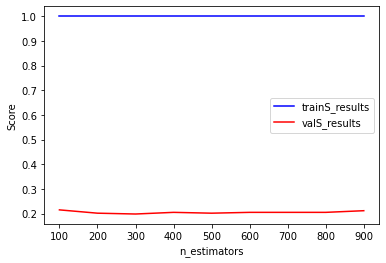

In [113]:
# Hyperparameter -  n_estimators 찾기

# 빈 배열을 생성하여 값 저장
n_estimators=[]
train_results=[]
test_results=[]

# start~end 까지 step간격으로 증가시키는 함수 생성 
def myrange(start, end, step): 
    r = start
    while(r<end):
        yield r
        r += step

# for문을 사용하여 100~1000 값을 n_estimators에 넣어줌
for i in myrange(100,1000,100):
    rf_test = RandomForestClassifier(n_estimators=i, random_state=99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainS, y_trainS.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainS, y_trainS)) # append함수로 현재 n_estimators 값에서의  training data 정확도 추가
    test_results.append(rf_test.score(x_valS, y_valS)) # append함수로 현재 n_estimators  값에서의 validation data 정확도 추가
    n_estimators.append(i) # append함수로 새로운  n_estimators값 추가
    
# 정확도 출력       
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(n_estimators, train_results,'b',label='trainS_results') # training data 정확도 그래프 생성 (blue)
plt.plot(n_estimators, test_results,'r',label='valS_results')  # validation data 정확도 그래프 생성 (red)
plt.xlabel('n_estimators') # x축= n_estimators
plt.ylabel('Score')  # y축= Score
plt.legend() #범례 
plt.show() #그래프 출력 

[0.26651735722284436, 0.2855543113101904, 0.3292273236282195, 0.3919372900335946, 0.45128779395296753, 0.5184770436730123, 0.6170212765957447, 0.7245240761478163, 0.8174692049272116, 0.8846584546472565, 0.9384098544232923, 0.9675251959686451, 0.9910414333706606, 0.9966405375139977, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.25838926174496646, 0.26174496644295303, 0.2516778523489933, 0.2516778523489933, 0.23154362416107382, 0.24161073825503357, 0.2348993288590604, 0.2483221476510067, 0.22818791946308725, 0.22818791946308725, 0.21476510067114093, 0.21476510067114093, 0.21140939597315436, 0.22483221476510068, 0.2080536912751678, 0.19798657718120805, 0.1912751677852349, 0.19463087248322147, 0.19463087248322147, 0.20134228187919462]


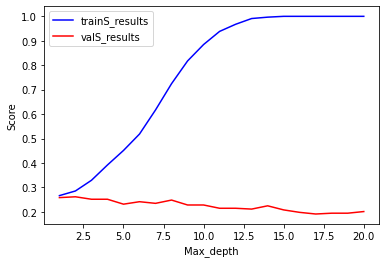

In [114]:
# Hyperparameter - max_depth 찾기 

# 빈 배열을 생성하여 값 저장 
Max_depth=[] 
train_results = [] 
val_results = []

# for문을 사용하여 1~21 값을 max depth에 넣어줌 
for i in range(1,21): 
    rf_test = RandomForestClassifier(max_depth=i,random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainS, y_trainS.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainS, y_trainS)) # append함수로 현재 max_depth 값에서의  training data 정확도 추가
    val_results.append(rf_test.score(x_valS, y_valS)) # append함수로 현재 max_depth 값에서의 validation data 정확도 추가 
    Max_depth.append(i)  # append함수로 새로운 max_depth값 추가 

# 정확도 출력 
print(train_results) # training data 정확도
print(val_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(Max_depth, train_results,'b',label='trainS_results') # training data 정확도 그래프 생성 (blue)
plt.plot(Max_depth, val_results,'r',label='valS_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('Max_depth') # x축= Max_depth
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

[1.0, 0.9876819708846585, 0.9036954087346024, 0.812989921612542, 0.729003359462486]
[0.21476510067114093, 0.23825503355704697, 0.21476510067114093, 0.2348993288590604, 0.23154362416107382]


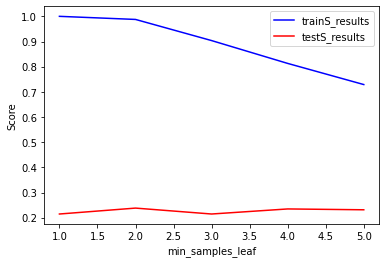

In [115]:
# Hyperparameter -  min_samples_leaf 찾기 

# 빈 배열을 생성하여 값 저장 
min_samples_leaf=[]
train_results = []
test_results = []

# for문을 사용하여 1~6 값을 min_samples_leaf에 넣어줌
for i in range(1,6):
    rf_test = RandomForestClassifier(min_samples_leaf=i, random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainS, y_trainS.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainS, y_trainS)) # append함수로 현재 min_samples_leaf 값에서의  training data 정확도 추가 
    test_results.append(rf_test.score(x_valS, y_valS)) # append함수로 현재  min_samples_leaf 값에서의 validation data 정확도 추가
    min_samples_leaf.append(i) # append함수로 새로운 min_samples_leaf값 추가 
    
# 정확도 출력     
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(min_samples_leaf, train_results,'b',label='trainS_results') # training data 정확도 그래프 생성 (blue)
plt.plot(min_samples_leaf, test_results,'r',label='testS_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('min_samples_leaf') # x축= min_samples_leaf
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

In [116]:
rf = RandomForestClassifier(random_state=70)   #random forest 분류모델을 rf라 정의한다.
# hyper parameter set 설정. 범위 선정 기준은 범위를 넓게 잡은 후 best로 선정됐던 숫자의 범위내로 점차 줄여간다
param_rf = {"criterion": ['gini', 'entropy'],  #어떤 기준으로 분리할지 지수 결정
          "max_depth": [10, 30, 50, 70], #트리의 깊이. 너무 깊으면 과적합될 수 있다.
          "min_samples_split": [2, 4, 6, 8, 10],  #해당 노드가 가지고 있는 최소한의 샘플의 개수를 나타낸다. 작게 설정할수록 과적합될 수도 있다.
          "min_samples_leaf": [1, 2, 3, 4, 5],    #또 다른 노드를 만들 수 있는 최소한의 샘플 수 조건을 뜻한다. 
          "max_features": ['sqrt','log2'],        #최적의 분할을 위해 고려할 최대 feature 개수
          "n_estimators": [20, 40, 60, 80, 100]   #결정트리의 갯수를 지정, 너무 크면 시간이 오래 걸림. 처음에 100-500 사이 범위로 돌린 결과 100이 나옴. 비슷한 과정 반복.
         }

grid_rf = GridSearchCV(rf, param_grid=param_rf,
                  cv=10, verbose=1, n_jobs=-1)
# cv는 cross validation에서 몇개로 분할되는지 지정해주는 값, (k-fold에서 k값)
# gridsearch기능을 활용하여 지정한 범위내에서 best hyperparameter들을 알아낸다
# grid_rf.fit(x_train,y_train) #모델을 fit시킨다

## SG hyper

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.30201342281879195, 0.3053691275167785, 0.3087248322147651, 0.2986577181208054, 0.28859060402684567, 0.31208053691275167, 0.3053691275167785, 0.3087248322147651, 0.3053691275167785]


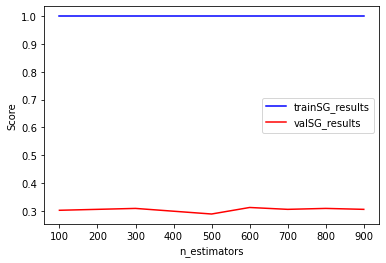

In [117]:
# Hyperparameter -  n_estimators 찾기

# 빈 배열을 생성하여 값 저장
n_estimators=[]
train_results=[]
test_results=[]

# start~end 까지 step간격으로 증가시키는 함수 생성 
def myrange(start, end, step): 
    r = start
    while(r<end):
        yield r
        r += step

# for문을 사용하여 100~1000 값을 n_estimators에 넣어줌
for i in myrange(100,1000,100):
    rf_test = RandomForestClassifier(n_estimators=i, random_state=99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainSG, y_trainSG.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainSG, y_trainSG)) # append함수로 현재 n_estimators 값에서의  training data 정확도 추가
    test_results.append(rf_test.score(x_valSG, y_valSG)) # append함수로 현재 n_estimators  값에서의 validation data 정확도 추가
    n_estimators.append(i) # append함수로 새로운  n_estimators값 추가
    
# 정확도 출력       
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(n_estimators, train_results,'b',label='trainSG_results') # training data 정확도 그래프 생성 (blue)
plt.plot(n_estimators, test_results,'r',label='valSG_results')  # validation data 정확도 그래프 생성 (red)
plt.xlabel('n_estimators') # x축= n_estimators
plt.ylabel('Score')  # y축= Score
plt.legend() #범례 
plt.show() #그래프 출력 

[0.25867861142217247, 0.3023516237402016, 0.3829787234042553, 0.47256438969764836, 0.5341545352743561, 0.6192609182530795, 0.7357222844344905, 0.832026875699888, 0.9025755879059351, 0.9518477043673013, 0.9809630459126539, 0.9944008958566629, 0.9988801791713325, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.2483221476510067, 0.28523489932885904, 0.2751677852348993, 0.29194630872483224, 0.3288590604026846, 0.3087248322147651, 0.2986577181208054, 0.30201342281879195, 0.29194630872483224, 0.28859060402684567, 0.31208053691275167, 0.30201342281879195, 0.2986577181208054, 0.2953020134228188, 0.2953020134228188, 0.30201342281879195, 0.28187919463087246, 0.2986577181208054, 0.3087248322147651, 0.2986577181208054]


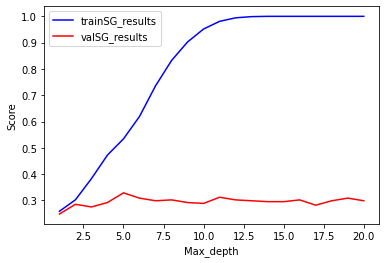

In [118]:
# Hyperparameter - max_depth 찾기 

# 빈 배열을 생성하여 값 저장 
Max_depth=[] 
train_results = [] 
val_results = []

# for문을 사용하여 1~21 값을 max depth에 넣어줌 
for i in range(1,21): 
    rf_test = RandomForestClassifier(max_depth=i,random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainSG, y_trainSG.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainSG, y_trainSG)) # append함수로 현재 max_depth 값에서의  training data 정확도 추가
    val_results.append(rf_test.score(x_valSG, y_valSG)) # append함수로 현재 max_depth 값에서의 validation data 정확도 추가 
    Max_depth.append(i)  # append함수로 새로운 max_depth값 추가 

# 정확도 출력 
print(train_results) # training data 정확도
print(val_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(Max_depth, train_results,'b',label='trainSG_results') # training data 정확도 그래프 생성 (blue)
plt.plot(Max_depth, val_results,'r',label='valSG_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('Max_depth') # x축= Max_depth
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

[1.0, 0.9910414333706606, 0.9473684210526315, 0.8756998880179171, 0.799552071668533]
[0.30201342281879195, 0.28859060402684567, 0.30201342281879195, 0.31208053691275167, 0.31543624161073824]


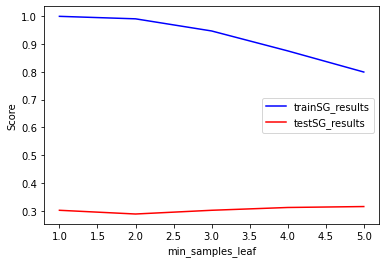

In [119]:
# Hyperparameter -  min_samples_leaf 찾기 

# 빈 배열을 생성하여 값 저장 
min_samples_leaf=[]
train_results = []
test_results = []

# for문을 사용하여 1~6 값을 min_samples_leaf에 넣어줌
for i in range(1,6):
    rf_test = RandomForestClassifier(min_samples_leaf=i, random_state =99) # RandomForestClassifier 모델 생성 
    rf_test.fit(x_trainSG, y_trainSG.ravel()) # 모델에 training data fitting 
    train_results.append(rf_test.score(x_trainSG, y_trainSG)) # append함수로 현재 min_samples_leaf 값에서의  training data 정확도 추가 
    test_results.append(rf_test.score(x_valSG, y_valSG)) # append함수로 현재  min_samples_leaf 값에서의 validation data 정확도 추가
    min_samples_leaf.append(i) # append함수로 새로운 min_samples_leaf값 추가 
    
# 정확도 출력     
print(train_results) # training data 정확도
print(test_results) # validation data 정확도

# 그래프를 생성하여 train data와 validation data의 정확도 비교 
plt.plot(min_samples_leaf, train_results,'b',label='trainSG_results') # training data 정확도 그래프 생성 (blue)
plt.plot(min_samples_leaf, test_results,'r',label='testSG_results') # validation data 정확도 그래프 생성 (red)
plt.xlabel('min_samples_leaf') # x축= min_samples_leaf
plt.ylabel('Score') # y축= Score
plt.legend() # 범례
plt.show() # 그래프 출력 

## 2번

In [287]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.choice('max_depth', np.arange(10, 1000+1, dtype=int)),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                   max_features = space['max_features'],
                                   min_samples_leaf = space['min_samples_leaf'],
                                   min_samples_split = space['min_samples_split'],
                                   n_estimators = space['n_estimators'], 
                                  )
    accuracy = cross_val_score(model, x, y, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(xd, yd)
pred = trainedforest.predict(xd)
print(confusion_matrix(yd, pred))
print(classification_report(yd, pred))
acc5 = accuracy_score(yd,pred)


# fit the model

In [90]:
# 최적의 hyperparameter로 model building 
rf_optS = RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_leaf=4, random_state=99) # RandomForestClassifier 모델 생성 
rf_optSG = RandomForestClassifier(n_estimators=400, max_depth=4, min_samples_leaf=5, random_state=99) # RandomForestClassifier 모델 생성  random_state=99

# model fitting
rf_optS = rf_optS.fit(xS, yS.values.ravel())
rf_optSG = rf_optSG.fit(xSG, ySG.values.ravel()) 

In [91]:
# S 정확도
train_socreS = rf_optS.score(x_trainS, y_trainS)
val_scoreS = rf_optS.score(x_valS, y_valS)
print("trainS accuracy = %0.4f\n validationS accuracy = %0.4f" %(train_socreS, val_scoreS)) 

rf_training_accS = rf_optS.score(xS, yS) # 모델의 성능 확인
print("Training accuracy = %0.4f" % rf_training_accS) # 정확도 출력 

C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


trainS accuracy = 0.4825
 validationS accuracy = 0.4302
Training accuracy = 0.4694


In [92]:
# SG 정확도
train_socreSG = rf_optSG.score(x_trainSG, y_trainSG)
val_scoreSG = rf_optSG.score(x_valSG, y_valSG)
print("trainSG accuracy = %0.4f\n validationSG accuracy = %0.4f" %(train_socreSG, val_scoreSG)) 

rf_training_accSG = rf_optSG.score(xSG, ySG) # 모델의 성능 확인
print("Training accuracy = %0.4f" % rf_training_accSG) # 정확도 출력 

C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sprout38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


trainSG accuracy = 0.4411
 validationSG accuracy = 0.4419
Training accuracy = 0.4413


In [93]:
feature_importancesS = rf_optS.feature_importances_
feature_importancesSG = rf_optSG.feature_importances_
print(feature_importancesS)
print(feature_importancesSG)

[0.33901497 0.24436313 0.17894676 0.23767514]
[0.19354771 0.12650104 0.05450626 0.07502665 0.15701543 0.1171076
 0.06274051 0.10507388 0.10848092]


In [94]:
rf_test_accS = rf_optS.score(xtS, ytS)
rf_test_accSG = rf_optSG.score(xtSG, ytSG)
rf_test_accmanS = rf_optS.score(manxtS, manytS)
rf_test_accmanSG = rf_optSG.score(manxtSG, manytSG)
print("testS accuracy = %0.4f" % rf_test_accS) # 정확도 출력 
print("testSG accuracy = %0.4f" % rf_test_accSG) # 정확도 출력
print("testmanS accuracy = %0.4f" % rf_test_accmanS) # 정확도 출력 
print("testmanSG accuracy = %0.4f" % rf_test_accmanSG) # 정확도 출력 

testS accuracy = 0.2813
testSG accuracy = 0.1608
testmanS accuracy = 0.2788
testmanSG accuracy = 0.3455


## 모델 정확도

In [319]:
predS = rf_optS.predict(xtS)
predSG = rf_optSG.predict(xtSG)

[[140  25  10  23  33]
 [300 114   0   1  30]
 [ 90  24  46  10  41]
 [171  31  21  31  49]
 [ 64  18   8  21  98]]
              precision    recall  f1-score   support

           1       0.18      0.61      0.28       231
           2       0.54      0.26      0.35       445
           3       0.54      0.22      0.31       211
           4       0.36      0.10      0.16       303
           6       0.39      0.47      0.43       209

    accuracy                           0.31      1399
   macro avg       0.40      0.33      0.30      1399
weighted avg       0.42      0.31      0.30      1399



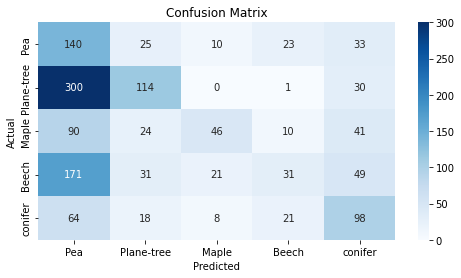

In [320]:
# 최종 보고서 작성시 그래프 그리기
cm = confusion_matrix(ytS, predS) 
print(cm)

report = classification_report(ytS, predS)
print(report)

# 'Pea':'1', 'Plane-tree':'2', 'Maple':'3', 'Beech':'4', 'Rose':'5', 'Etc1(침엽수)':'6', 'Etc2(활엽수)':'7'
plt.figure(figsize=(8,4))
# x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
# y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'conifer']
y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'conifer']
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, xticklabels = x_lable, yticklabels = y_lable, fmt='d', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
# precision, recall의 의미를 잘 알고 해석해야 함.
# 그래프말고 
# 고랭지 배추와 감자가 혼재됨. => 해당시기 두 개의 분광특성이 유사하다는 의미 ... 다른 시기의 영상 ... 분류에 가장 중요한 것은 입력자료
# 보고서에서 가장 중요한 것. 어떠한 결과가 나와서 """해석/분석"""하는 것이 중요 .. 발전방향

[[123  37  48   4  19]
 [142 265  22   3  13]
 [ 76  21  65  11  38]
 [139  29  93   7  35]
 [ 76  10  43   7  73]]
              precision    recall  f1-score   support

           1       0.22      0.53      0.31       231
           2       0.73      0.60      0.66       445
           3       0.24      0.31      0.27       211
           4       0.22      0.02      0.04       303
           6       0.41      0.35      0.38       209

    accuracy                           0.38      1399
   macro avg       0.36      0.36      0.33      1399
weighted avg       0.41      0.38      0.37      1399



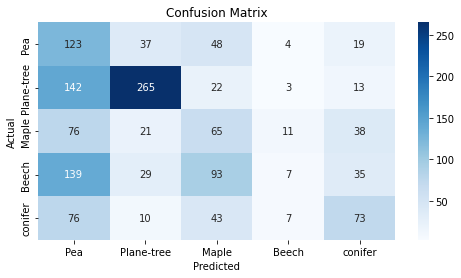

In [321]:
# 최종 보고서 작성시 그래프 그리기
cm = confusion_matrix(ytSG, predSG)
print(cm)

report = classification_report(ytSG, predSG)
print(report)

# 'Pea':'1', 'Plane-tree':'2', 'Maple':'3', 'Beech':'4', 'Rose':'5', 'Etc1(침엽수)':'6', 'Etc2(활엽수)':'7'
plt.figure(figsize=(8,4))
# x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
# y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'Rose', 'conifer', 'broad-leaf']
x_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'conifer']
y_lable = ['Pea', 'Plane-tree', 'Maple', 'Beech', 'conifer']
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, xticklabels = x_lable, yticklabels = y_lable, fmt='d', cmap='Blues')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()